# __RetailVC's Retail Analytics Solutions:__
##  Exploratory Data Analysis(EDA) for fraud detection system of Retail Analytics:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency

# Exploratory Data Analysis (EDA)

## __Task 1: General Data Overview:__

In [8]:
# a) Check the first few rows of the dataset to understand its structure
print(f"\033[1ma) Check the first few rows of the dataset to understand its structure:\033[0m")
print(" ")

# Update the path to your actual CSV file location
# Example: If the file is in the same folder as the notebook
df = pd.read_csv('retail_data.csv')
df.head()

a) Check the first few rows of the dataset to understand its structure:
 


,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,1985,40,36-45,Graduation,Married,70951,0,0,2013-05-04 00:00:00,...,4,9,1,0,0,0,0,0,0,0
1,1,1961,64,56+,Graduation,Single,57091,0,0,2014-06-15 00:00:00,...,3,7,5,0,0,0,0,1,0,1
2,9,1975,50,46-55,Master,Single,46098,1,1,2012-08-18 00:00:00,...,2,2,8,0,0,0,0,0,0,0
3,13,1947,78,56+,PhD,Widow,25358,0,1,2013-07-22 00:00:00,...,0,3,6,0,0,0,0,0,0,0
4,17,1971,54,46-55,PhD,Married,60491,0,1,2013-09-06 00:00:00,...,11,7,5,0,0,0,0,0,0,0


In [9]:
# b) Check the data types of each column
print(f"\033[1mb) Check the data types of each columnhe dataset:\033[0m")
print(" ")

df.dtypes

b) Check the data types of each columnhe dataset:
 


ID                      int64
Year_Birth              int64
Age                     int64
Age_Group              object
Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Response                int64
dtype: object

In [10]:
# C) Check for any missing values in the dataset
print(f"\033[1mc) Check for any missing values in the dataset:\033[0m")
print(" ")

df.isnull().sum()

c) Check for any missing values in the dataset:
 


ID                     0
Year_Birth             0
Age                    0
Age_Group              0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

## __Task 2: Descriptive Statistics:__

In [11]:
# a) Compute summary statistics for numerical columns
print(f"\033[1ma) Compute summary statistics for numerical columns:\033[0m")
print(" ")

df.describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

a) Compute summary statistics for numerical columns:
 


,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Age,2216.0,56.179603,11.985554,29.0,48.00,55.0,66.00,132.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0


b) Explore the distribution of numerical variables using histograms:
 
 


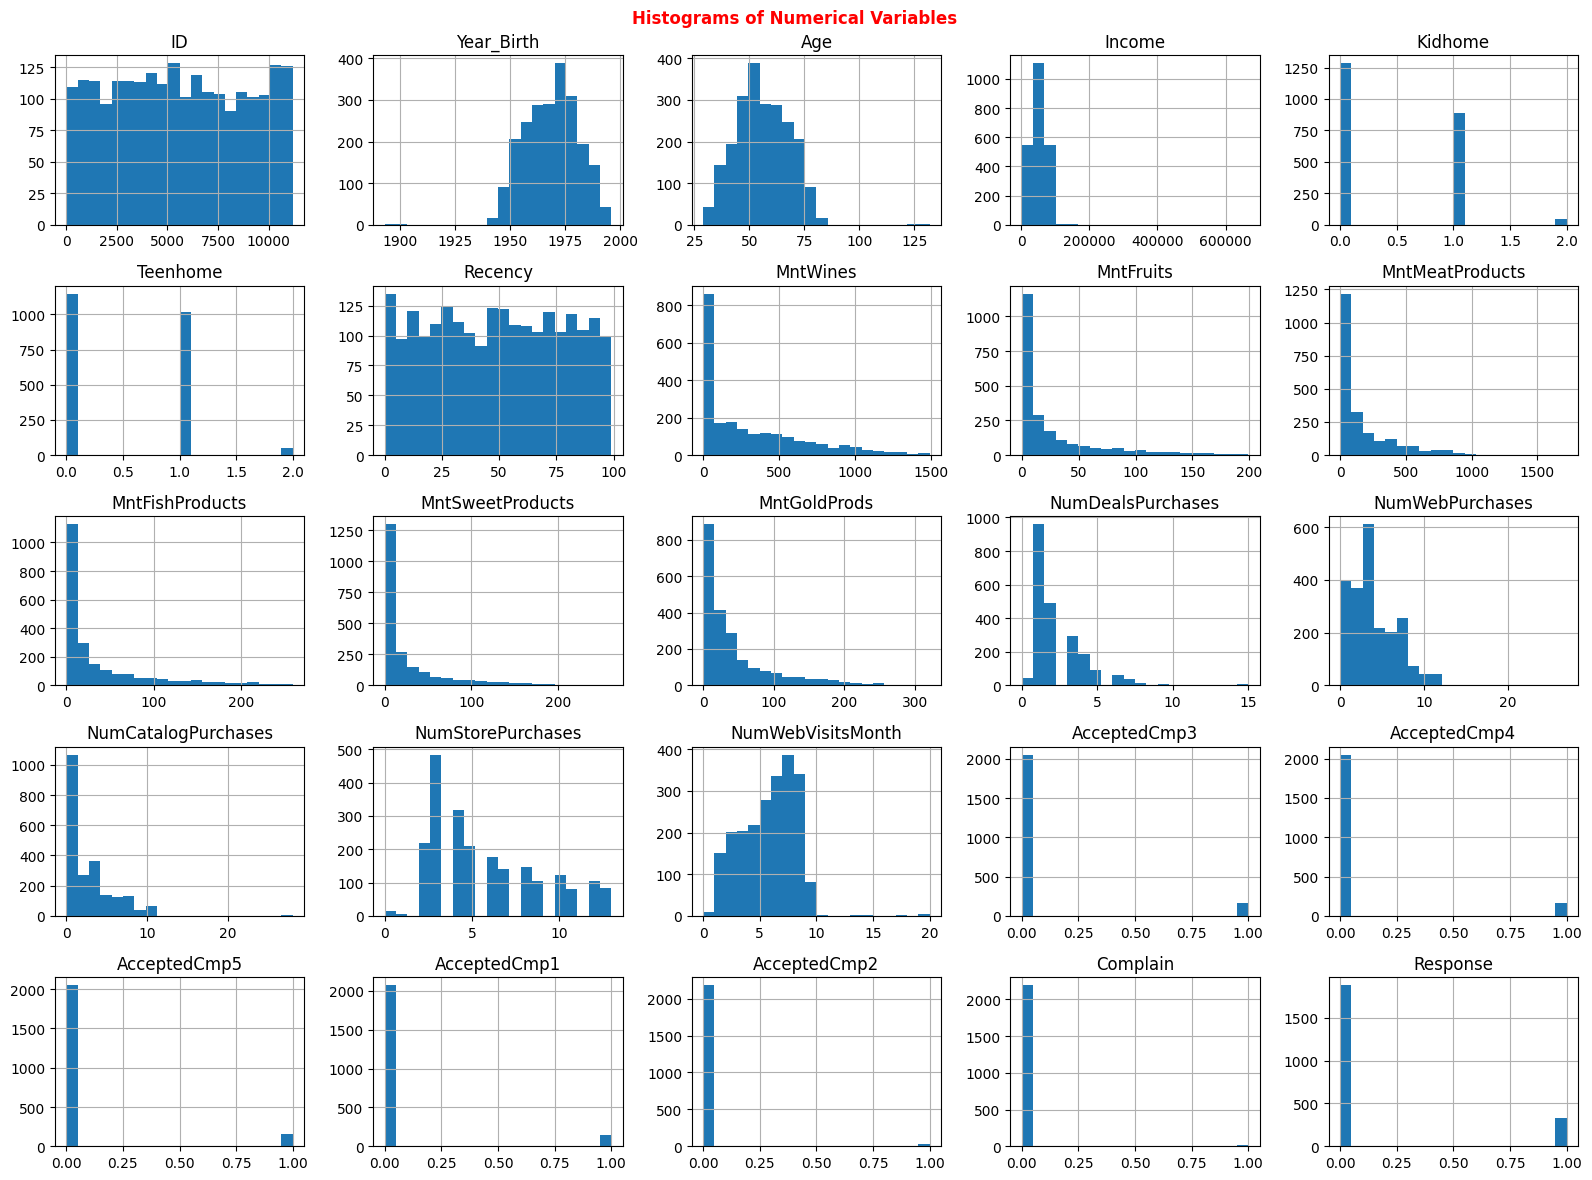

In [12]:
# b) Explore the distribution of numerical variables using histograms
print(f"\033[1mb) Explore the distribution of numerical variables using histograms:\033[0m")
print(" ")
print(" ")

df.select_dtypes(include='number').hist(bins=20, figsize=(16, 12))
plt.suptitle('Histograms of Numerical Variables', fontweight = 'bold', color = 'red')
plt.tight_layout()
plt.show()

# __Key Observations by Category - Histograms:__

#### __1) Demographic Variables:__

__Year_Birth / Age:__
- Year_Birth: Concentrated around 1960–1980, suggesting most customers are middle-aged.
- Age: Normally distributed but slightly right-skewed, with a large cluster in the 40–60 range.
- Income: Strongly right-skewed — most customers earn below 100,000. Few high-income individuals are outliers.

__Kidhome / Teenhome:__
- Only values: 0, 1, or 2. Most customers have no children or teenagers at home.

#### __2) Product Spending:__
    
__MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:__
- All are heavily right-skewed.
- Most customers spend little or nothing, while a small number spend a lot — these are likely loyal or high-value customers.

#### __3) Purchase Channels:__
    
__NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth:__
- Similar patterns — many customers have low to moderate purchase counts.
- Some have high engagement, especially online (NumWebVisitsMonth peaks around 7–8).

#### __4) Campaign Response:__
    
__AcceptedCmp1 to AcceptedCmp5:__
- Heavily imbalanced binary features.
- Most values are 0 — very low acceptance rates across all campaigns.

__Response:__
- Also binary. Majority are 0 — very few customers responded to the latest campaign.
- Indicates that the overall campaign performance may be poor or needs better targeting.

#### __5) Others:__
        
__Complain:__
- Nearly all values are 0.
- Very few customers complained — possibly good service, or poor feedback capture.



b) Explore the distribution of numerical variables using Boxplots:
 


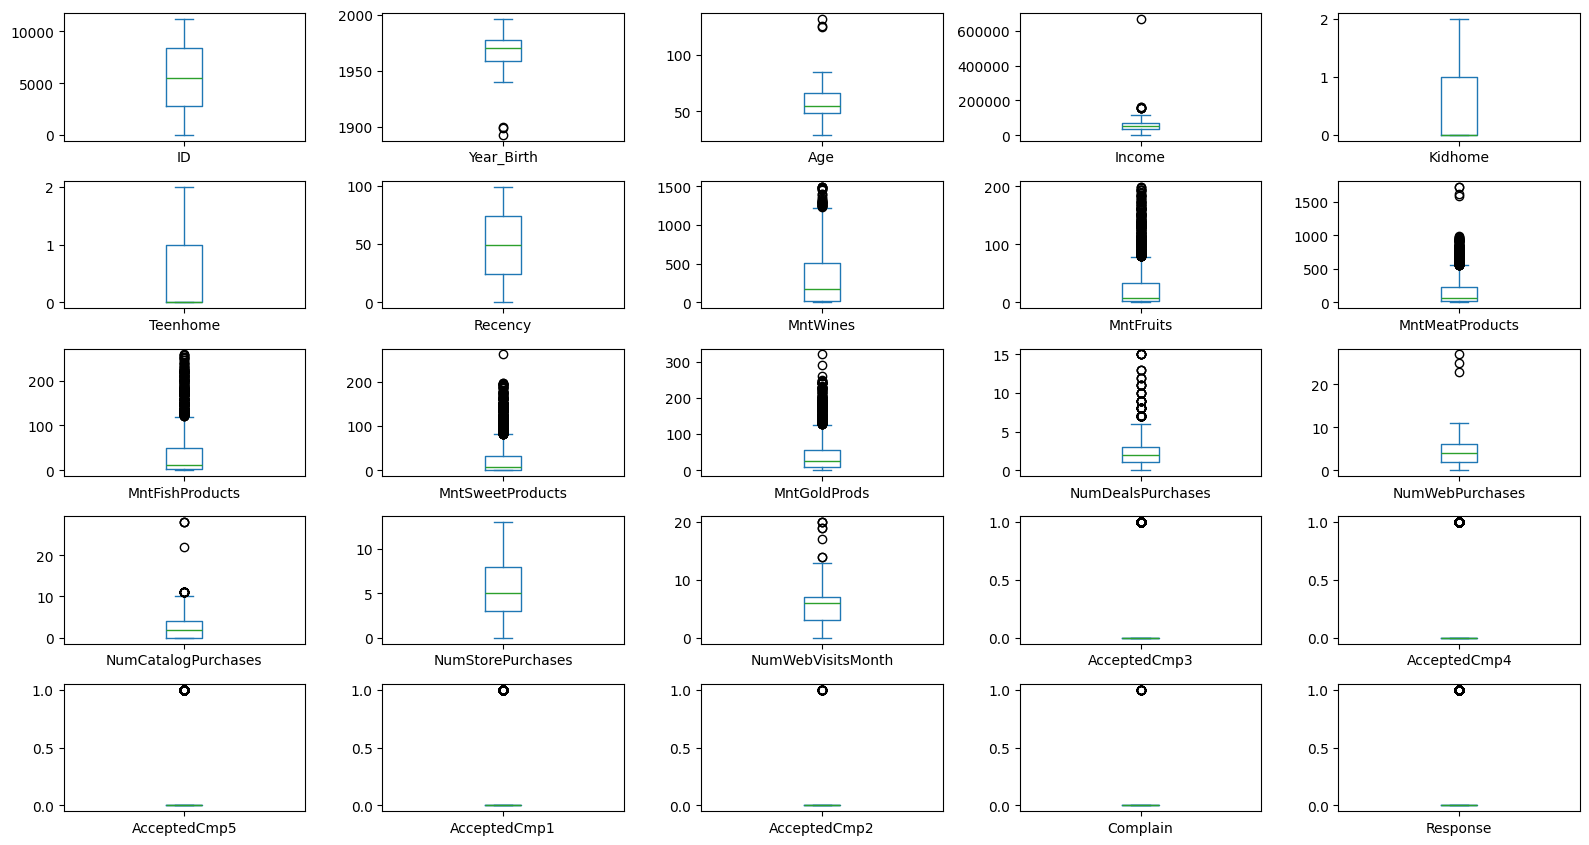

In [13]:
# Explore the distribution of numerical variables using Boxplots
print(f"\033[1mb) Explore the distribution of numerical variables using Boxplots:\033[0m")
print(" ")

df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(6, 5), figsize=(16, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# __Key Observations by Category - Boxplots:__

#### __1) Demographics:__

__Year_Birth:__

Values span from early 1900s to ~2000.
 - No extreme outliers, but some customers are unusually Old.

__Age:__
  - Derived from Year_Birth. A few outliers below age 30, suggesting some younger customers.

__Income:__
  - Clear presence of strong outliers (one or two very high-income customers) — skewing the data significantly.
  - You might consider capping or transforming income for modeling.

__Kidhome / Teenhome:__

- Binary/low-count variables.
- No outliers.
- Most values are either 0, 1, or 2.

#### __2) Purchase Behavior:__

MntWines, MntMeatProducts, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds:

These represent spending amount on different product types.
  - Almost all have many outliers — customers spending much more than the median.
  - Median spending is quite low, but a small group of customers spend heavily (e.g., loyal or high-value customers).

#### __3) Purchase Channels:__

NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth:

Outliers present — some customers make significantly more purchases than others.

  - Indicates the presence of power users or promotion-sensitive customers.

#### __4) Marketing Campaigns:__
      
__AcceptedCmp1 to AcceptedCmp5:__ 
Binary (0/1), representing campaign acceptance.
  - No outliers; expected due to binary nature.

__Response:__ 
  Target variable, also binary.
  - Balanced in terms of outlier structure.

#### __5) Other Variables:__
      
__Recency:__
Time since last purchase.
Wide spread, few outliers.
  - Some customers have been recently active, some inactive for long periods.

__Complain:__
Binary (0/1), shows no outliers. Most customers haven't complained.


##  __Task 3: Univariate Analysis:__

a) Explore the distribution of each numerical variable using histograms or kernel density plots:
 


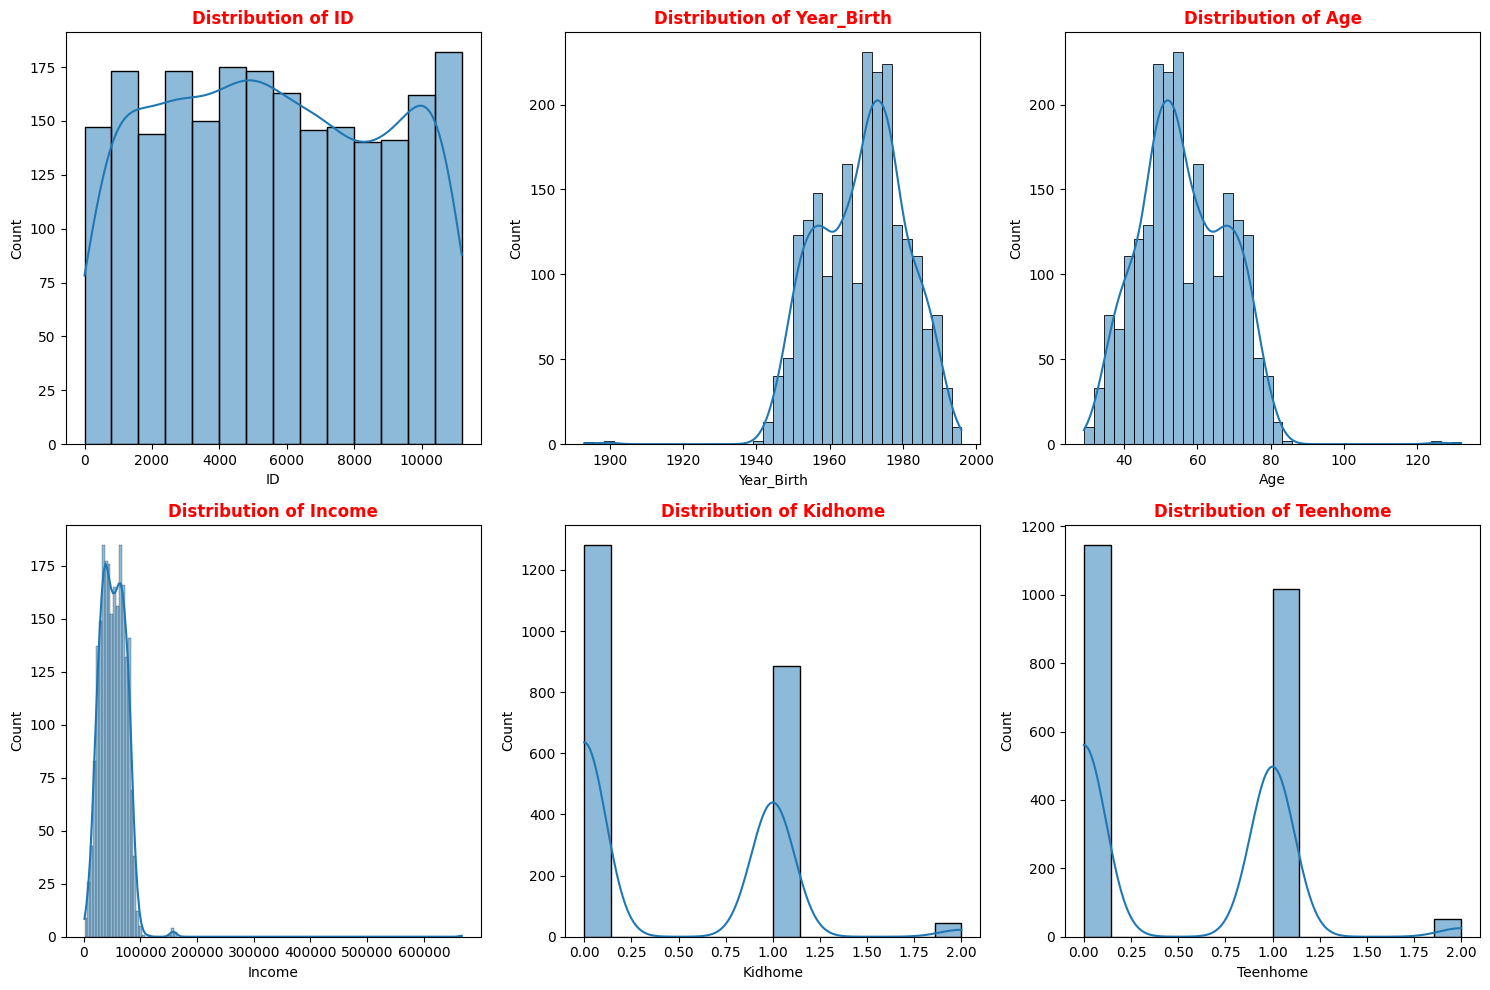

In [14]:
# a) Explore the distribution of each numerical variable using histograms or kernel density plots
print(f"\033[1ma) Explore the distribution of each numerical variable using histograms or kernel density plots:\033[0m")
print(" ")

num_cols = df.select_dtypes(include='number').columns[:6]
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}', fontweight = 'bold', color = 'red')
plt.tight_layout()
plt.show()

# __Category-wise Insights:__

#### __1. ID (Customer ID):__
- Uniform Distribution: All IDs are evenly distributed; expected since IDs are sequential identifiers.
- No skew or bias here. Not analytically meaningful but good for indexing.

#### __2. Year_Birth:__      
- Concentrated between 1950 and 1980, peaking around 1965–1975.
- Very few customers are born before 1940 or after 1985.
- Suggests most customers are aged 40–70.

#### __3. Age:__
- Derived from Year_Birth.
- Slightly right-skewed normal distribution with most ages between 40–70.
- Age is well-distributed; a good feature for segmentation (e.g., seniors vs young adults).

#### __4. Income:__      
- Highly right-skewed: Majority earn below ₹100,000.
- A few very high-income customers create long right tail (KDE shows this).
- Consider log-transforming this variable to reduce skew before modeling.

#### __5. Kidhome:__
- Discrete values: 0, 1, 2.
- KDE suggests two major peaks:
- Most customers have 0 or 1 child at home.
- Insight: Family-oriented promotions may not suit the entire customer base.

#### __6. Teenhome:__       
- Similar to Kidhome.
- Peaks at 0 and 1, very few have 2 teenagers.
- Insight: Segmenting by family type (with or without teens) is feasible.


b) Explore the distribution of each categorical variable using bar plots:
 


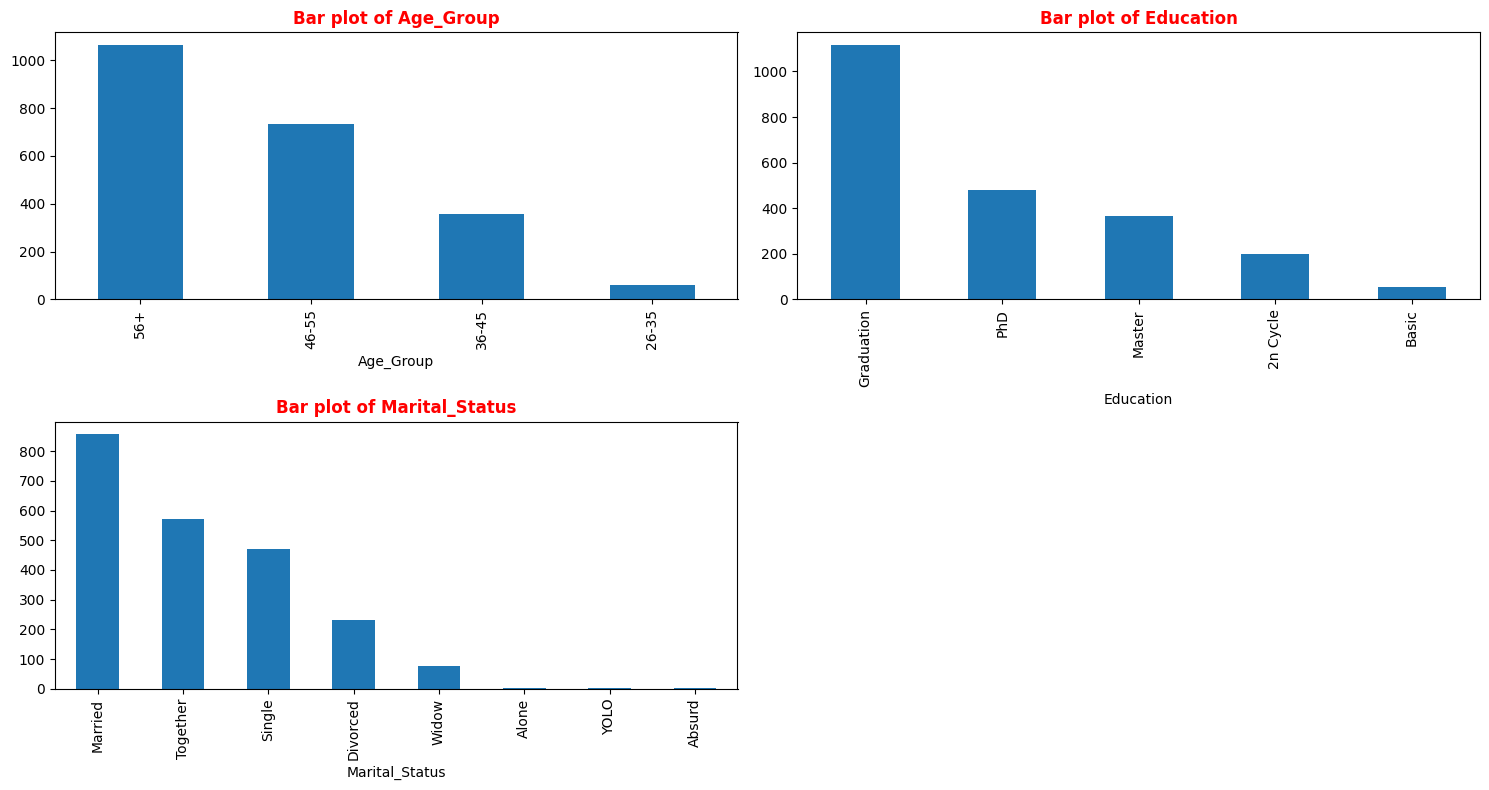

In [15]:
# b) Explore the distribution of each categorical variable using bar plots

print(f"\033[1mb) Explore the distribution of each categorical variable using bar plots:\033[0m")
print(" ")

cat_cols = df.select_dtypes(include='object').columns[:3]
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {col}', fontweight = 'bold', color = 'red')
plt.tight_layout()
plt.show()

# __Category-Wise Analysis:__

#### __1. Age_Group Distribution:__

| **Age Group** | **Observation** |
|---------------|-----------------|
| 56+           | Highest frequency – majority of customers fall in this senior age group. |
| 46–55         | Second largest group – strong middle-aged customer base. |
| 36–45         | Fewer customers. |
| 26–35         | Very few young customers – lowest represented. |

__*** Implication: The customer base is older-skewed, ideal for products or campaigns targeting mature adults or retirees.__

#### __2. Education Distribution:__

| **Education Level** | **Observation** |
|---------------------|-----------------|
| Graduation          | Dominant category – most customers have completed graduation. |
| PhD & Master        | Represent well-educated individuals (next highest). |
| 2nd Cycle           | Smaller segment. |
| Basic               | Very few customers have only basic education. |

__*** Implication: This is a highly educated audience – may respond better to logical, value-driven marketing rather than emotional appeals.__

#### __3. Marital_Status Distribution:__

| **Status**            | **Observation**                                                   |
|-----------------------|--------------------------------------------------------------------|
| Married               | Largest group – ~850 customers.                                   |
| Together              | Second highest – likely long-term partners.                       |
| Single & Divorced     | Moderate representation.                                          |
| Widow                 | Few in number.                                                    |
| Alone, YOLO, Absurd   | Extremely rare – possibly data entry errors or rare cases.        |

- Suggestion: Consider merging rare/unusable categories (YOLO, Absurd) into an "Other" group for cleaner analysis.

__*** Implication: Most customers live in couple households, which could influence marketing (e.g., family-oriented promotions).__



b) Explore the distribution of each categorical variable using pie charts:
 


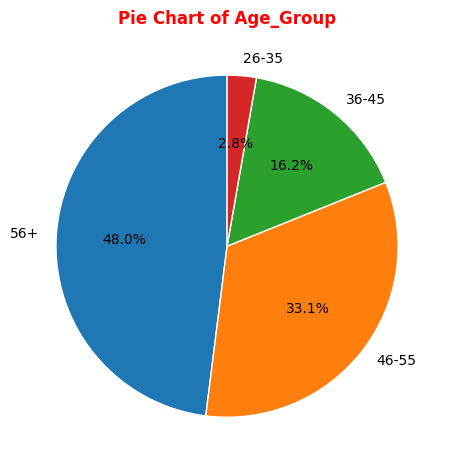

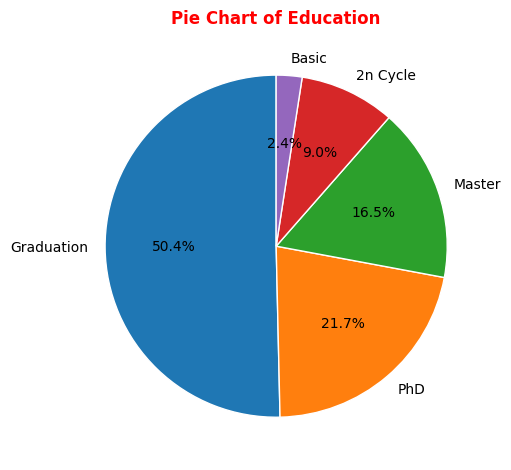

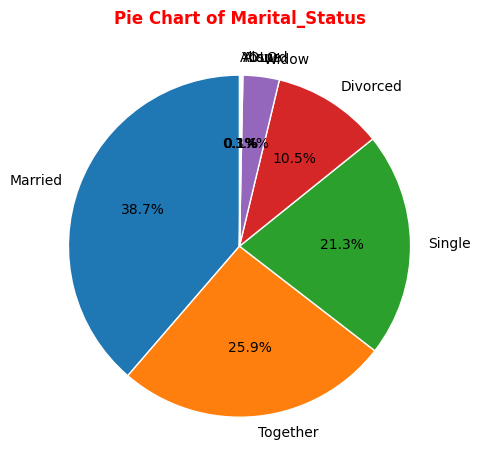

In [16]:
# b) Explore the distribution of each categorical variable using pie charts

print(f"\033[1mb) Explore the distribution of each categorical variable using pie charts:\033[0m")
print(" ")
# Select top 3 categorical columns
cat_cols1 = df.select_dtypes(include='object').columns[:3]

# Loop through selected categorical columns and create pie charts
for col in cat_cols1:
    plt.figure()
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
    plt.title(f"Pie Chart of {col}", fontweight = 'bold', color = 'red')
    plt.ylabel('')  # Removes the y-axis label
    plt.tight_layout()
    plt.show()

# __Category-Wise Insights:__

#### __1) Age_Group:__

| Group     | Percentage                        |
| --------- | --------------------------------- |
| **56+**   | **48.6%** – Largest group         |
| **46–55** | 33.1%                             |
| **36–45** | 16.2%                             |
| **26–35** | 2.1% – Very few younger customers |

__Observation:__
- Customer base is strongly older-skewed.
- Campaigns or product offerings should cater to mature audiences (e.g., health, wellness, investment, luxury).

#### __2) Education:__

| Level          | Percentage                        |
| -------------- | --------------------------------- |
| **Graduation** | **50.4%** – Majority of customers |
| **PhD**        | 21.77%                            |
| **Master**     | 18.5%                             |
| **2n Cycle**   | 7.3%                              |
| **Basic**      | 2.0%                              |

__Observation:__
- Most customers are highly educated.
- This suggests that data-driven, informative, and value-based campaigns will resonate better than emotional appeals.

#### __3) Marital_Status:__

| Status                  | Percentage        |
| ----------------------- | ----------------- |
| **Married**             | **38.7%**         |
| **Together**            | 25.9%             |
| **Single**              | 21.3%             |
| **Divorced**            | 10.5%             |
| **Widow**               | 3.1%              |
| **Alone, YOLO, Absurd** | < 1% – negligible |

__Observation:__
- 64.6% of customers are in relationships (Married + Together).
- Family or couple-oriented products/promotions are likely to be more effective.
- Low number of young singles aligns with the age distribution.


c) Identify outliers in numerical variables using box plots:
 


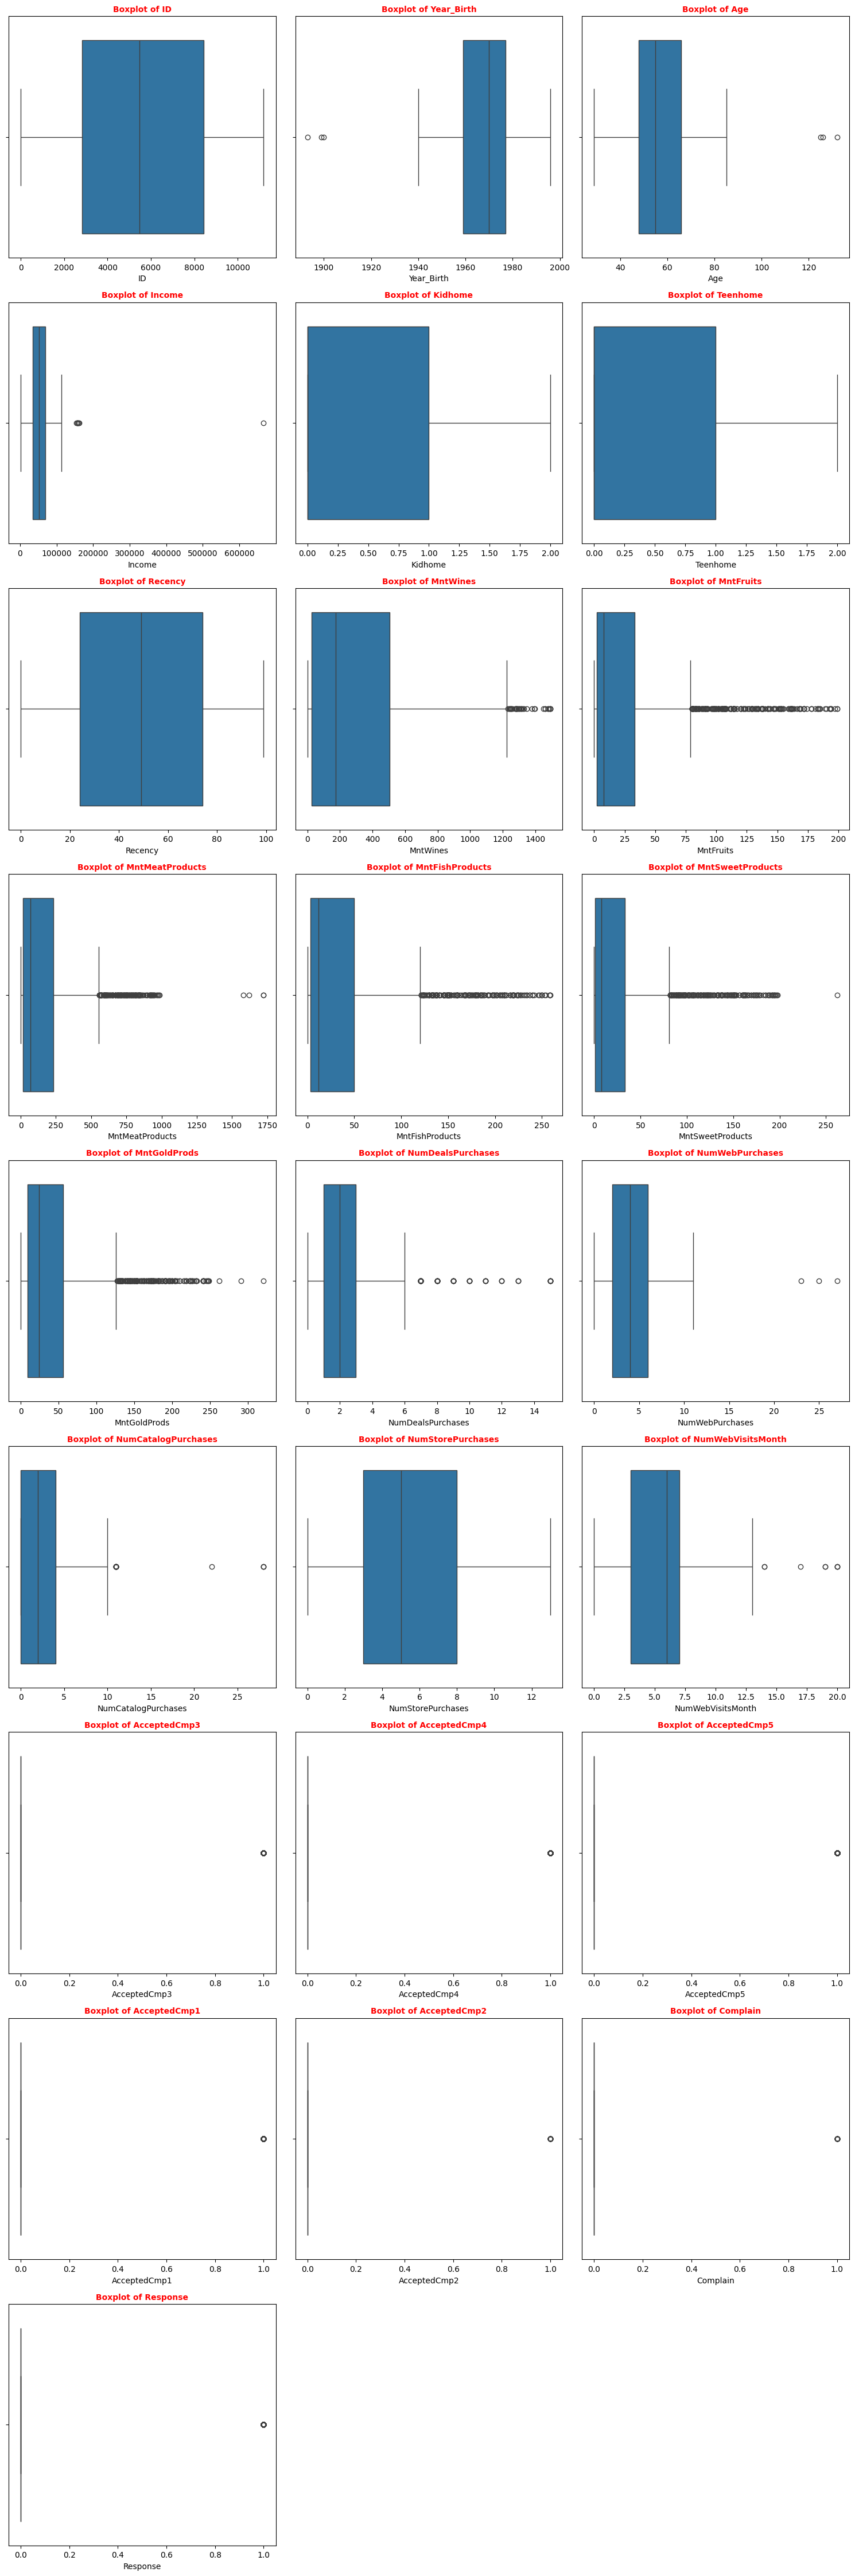

In [17]:
# c. Outliers in numerical variables
print(f"\033[1mc) Identify outliers in numerical variables using box plots:\033[0m")
print(" ")


# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Set number of plots per row
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Flatten to 1D for easier indexing

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10, fontweight = 'bold', color = 'red')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# __Key Observations by Variable Group:__

#### __1) Identifiers & Demographics:__

| Variable        | Observation                                                                    |
| --------------- | ------------------------------------------------------------------------------ |
| **ID**          | Uniform distribution, no outliers – ID is a unique key.                        |
| **Year\_Birth** | Slight spread, few outliers before 1940 – customers born before 1940 are rare. |
| **Age**         | Normal-like spread, minimal outliers – mostly between 30–80.                   |
| **Income**      | Strong outliers on the higher end – few high-income customers (rich skew).     |

#### __2) Household:__

| Variable                   | Observation                                                  |
| -------------------------- | ------------------------------------------------------------ |
| **Kidhome** / **Teenhome** | Categorical (0, 1, 2) – no real outliers, expected box size. |

#### __3) Purchase Amounts:__

| Variable                                | Observation                                                                                       |
| --------------------------------------- | ------------------------------------------------------------------------------------------------- |
| **MntWines**, **MntMeatProducts**       | **Heavy right skew with many outliers** – a few customers purchase much more than the average.    |
| **MntGoldProds**                        | Outliers present, moderate volume of purchases.                                                   |
| **MntFruits**, **MntFishProducts**      | Lower values, long right tail.                                                                    |

#### __4) Purchase Frequency:__

| Variable                                         | Observation                                                          |
| ------------------------------------------------ | -------------------------------------------------------------------- |
| **NumDealsPurchases**, **NumWebPurchases**       | Mild right skew, few outliers – most customers make fewer purchases. |

#### __5) Campaign Responses:__

| Variable                         | Observation                                       |
| -------------------------------- | ------------------------------------------------- |
| **AcceptedCmp1 to AcceptedCmp5** | Binary values (0 or 1) – no meaningful box shape. |
| **Response**                     | Binary – similar, no outliers.                    |

#### __6) Complaints:__

| Variable     | Observation                                                     |
| ------------ | --------------------------------------------------------------- |
| **Complain** | Binary – no spread or outliers. Mostly 0 (very few complaints). |













## __Task 4: Bivariate Analysis:__

a) Explore the relationship between numerical variables and the target variable (Response) using scatter plots or correlation matrices:
 


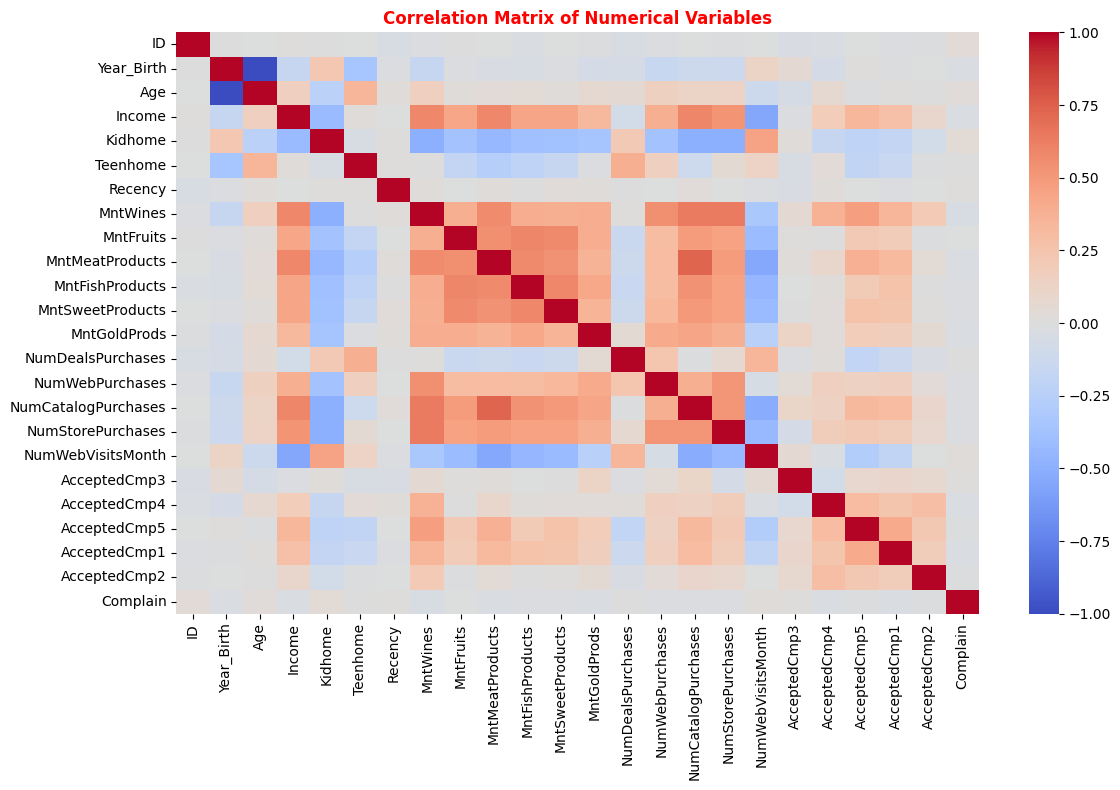

In [18]:
print(f"\033[1ma) Explore the relationship between numerical variables and the target variable (Response) using scatter plots or correlation matrices:\033[0m")
print(" ")

df['Response'] = df['Response'].astype('category')
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns.drop('Response', errors='ignore')


# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Variables', fontweight = 'bold', color = 'red')
plt.tight_layout()
plt.show()

# __Key Insights & Analysis:__

#### __1) Customer Purchases Correlations:__

| Variables                                                     | Correlation Observation                        |
| ------------------------------------------------------------- | ---------------------------------------------- |
| **MntWines**, **MntMeatProducts**, **MntSweetProducts**       | Strong positive correlation among each other   |
| **MntWines** vs **MntGoldProds**                              | Moderate–strong positive correlation           |
| **MntFruits** vs **MntFishProducts**                          | Also moderately correlated                     |

__Interpretation:__
- Customers who spend on one product type are **likely to spend on others**. Indicates **high-value multi-category buyers**.

#### __2) Demographic Factors:__

| Pair                               | Correlation                   |
| ---------------------------------- | ----------------------------- |
| **Age** vs **Year\_Birth**         | Strong negative (expected)    |
| **Income** vs **Kidhome/Teenhome** | Slight negative correlation   |
| **Age** vs **Income**              | Weak or no correlation        |

__Remarks:__
- Older customers are not necessarily wealthier; campaigns must consider age and income separately.

#### __3) Promotional Campaigns:__

| Variables                                      | Observation                               |
| ---------------------------------------------- | ----------------------------------------- |
| **AcceptedCmp1–5**                             | Moderate correlations between campaigns |
| **AcceptedCmp5** vs **MntWines** or **Income** | Slight–moderate positive correlation    |

__Insight:__
- If a customer accepted **one campaign**, they are more likely to accept others. Use this to create **propensity models**.

#### __4) Purchase Frequency vs Amount:__

| Variables                                    | Correlation                              |
| -------------------------------------------- | ---------------------------------------- |
| **NumCatalogPurchases** vs **MntWines/Meat** | Moderate positive                        |
| **NumWebVisitsMonth** vs **Purchases**       | Very weak or even negative correlation |

__Remarks:__
- More **website visits** don't always translate to more purchases. Indicates possible UX or conversion issues.

#### __5) Complain Column:__

- Very low/insignificant correlations across all variables

**Insight:** Complaints are likely isolated incidents and not driven by spending, visits, or age.



b) Explore the relationship between categorical variables and the target variable using bar plots or chi-square tests:
 

Chi-Square Test between 'Age_Group' and 'Response':
Chi2 = 8.32, p-value = 0.0399
Statistically significant relationship (p < 0.05)

Chi-Square Test between 'Education' and 'Response':
Chi2 = 23.15, p-value = 0.0001
Statistically significant relationship (p < 0.05)

Chi-Square Test between 'Marital_Status' and 'Response':
Chi2 = 53.51, p-value = 0.0000
Statistically significant relationship (p < 0.05)

Chi-Square Test between 'Dt_Customer' and 'Response':
Chi2 = 781.99, p-value = 0.0008
Statistically significant relationship (p < 0.05)


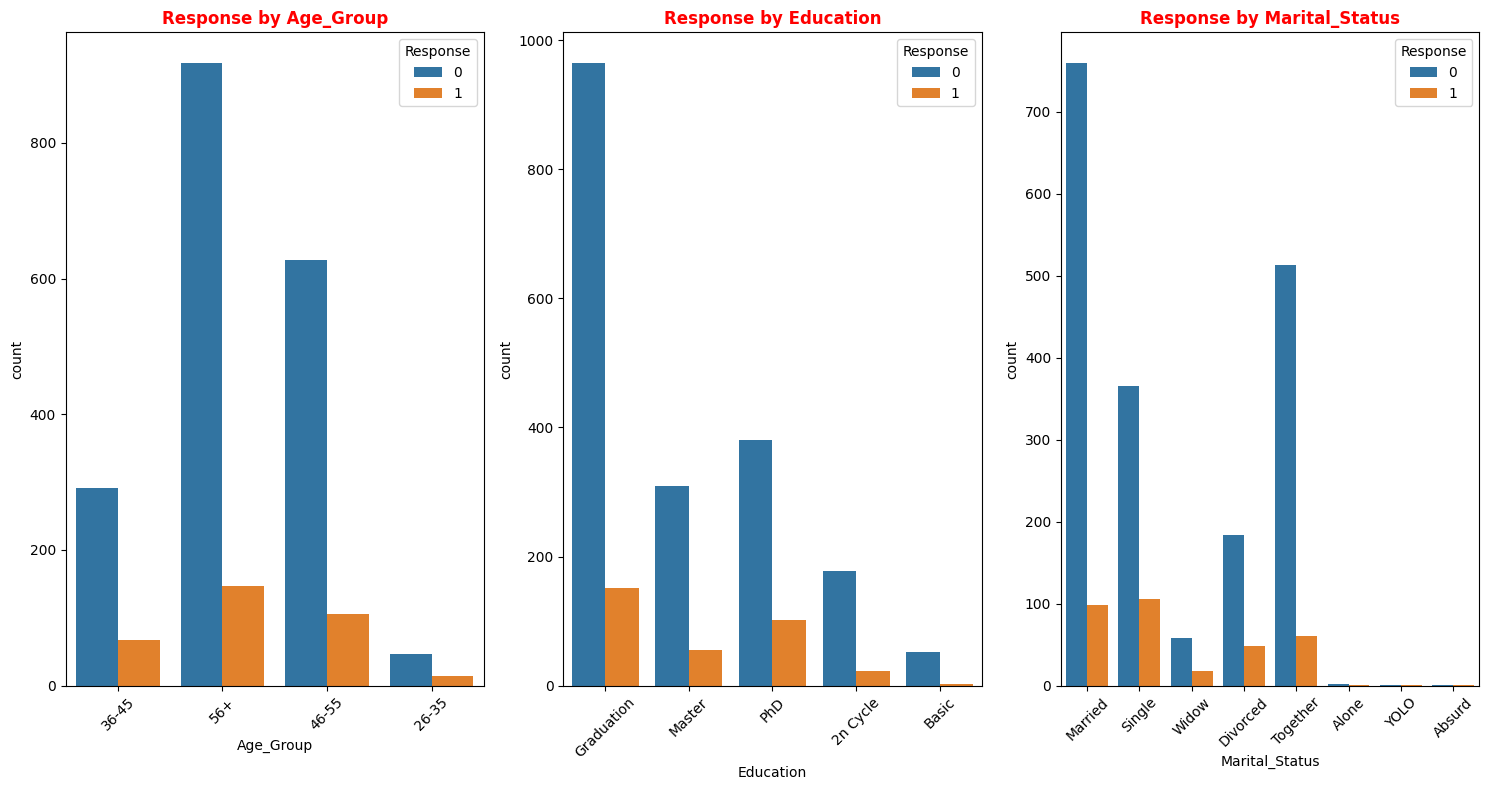

In [19]:
# b. Categorical vs Target (Chi-Square Test + Bar Plots)
print(f"\033[1mb) Explore the relationship between categorical variables and the target variable using bar plots or chi-square tests:\033[0m")
print(" ")

for col in cat_cols:
    contingency = pd.crosstab(df[col], df['Response'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f"\nChi-Square Test between '{col}' and 'Response':")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Statistically significant relationship (p < 0.05)")
    else:
        print("No significant relationship (p ≥ 0.05)")
        
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols[:3]):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Response', data=df)
    plt.title(f'Response by {col}', fontweight = 'bold', color = 'red')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# __CHI-SQUARE TEST RESULTS:__

| Feature             | Chi2 Value | p-value | Conclusion                             |
| ------------------- | ---------- | ------- | -------------------------------------- |
| **Age\_Group**      | 8.32       | 0.0399  | Statistically Significant (p < 0.05) |
| **Education**       | 23.15      | 0.0001  | Statistically Significant (p < 0.05) |
| **Marital\_Status** | 53.51      | 0.0000  | Statistically Significant (p < 0.05) |
| **Dt\_Customer**    | 781.99     | 0.0000  | Statistically Significant (p < 0.05) |

**Remarks:**
- These results indicate that all four variables are significantly associated with marketing campaign responses.

# __BAR PLOT ANALYSIS:__

#### __1) Response by Age_Group:__

- 56+ group is the largest, but most responded "No".
- 36-45 and 46-55 groups show relatively higher response rates.
- Younger group (26–35) has the smallest population, and lowest participation.

**Insight:**
- Middle-aged customers (36–55) may be more responsive than seniors or younger ones.

#### __2) Response by Education:__

- Customers with Graduation are the largest group but have lower response rate.
- PhD and 2n Cycle groups have relatively higher response rates compared to size.
- Basic education group is small and not very responsive.

**Insight:**
- Highly educated customers (PhD/Master) are more likely to respond to campaigns. Tailoring campaigns for them could be fruitful.

#### __3) Response by Marital_Status:__

- Married and Together segments dominate, but have lower response rates.
- Single and Divorced groups show higher participation ratios despite smaller size.
- Widow, Alone, YOLO, Absurd show minimal engagement.

**Insight:**
- Singles and Divorced customers may be more receptive to campaigns. Campaign messaging could be personalized for them.




  

c) Explore the relationship between numerical and categorical variables using violin plots:
 


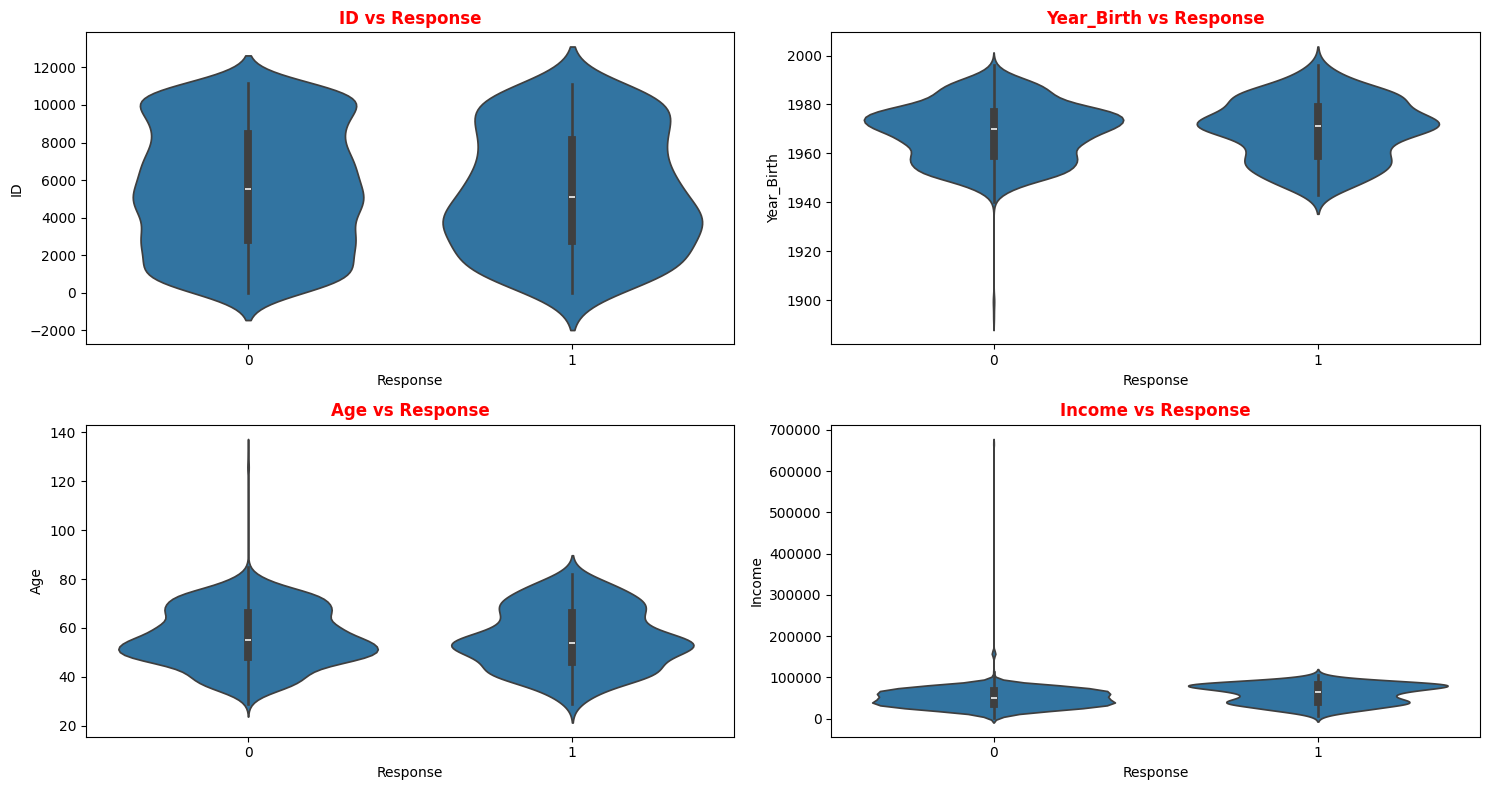

In [20]:
# Violin plots
print(f"\033[1mc) Explore the relationship between numerical and categorical variables using violin plots:\033[0m")
print(" ")


plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:4]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Response', y=col, data=df)
    plt.title(f'{col} vs Response', fontweight = 'bold', color = 'red')
plt.tight_layout()
plt.show()

# __Violin Plots Analysis: Numerical vs Categorical Variable:__

#### __1) ID vs Response:__

- Symmetrical and uniform distribution for both response classes.
- Suggests ID is just an identifier (no predictive power or relationship with Response).

**Insight:** Ignore ID in modeling; it has no analytical value.

#### __2) Year_Birth vs Response:__

- Slight right shift for responders (value = 1) — indicating they are younger on average.
- Non-responders span a broader year range including older customers.

**Insight:** Younger customers (born more recently) are more likely to respond to campaigns.

#### __3) Age vs Response:__

- Confirming above: Responders are generally younger (peak around 50–60 years).
- Non-responders have wider distribution (extending to higher ages).

**Insight:** Age is inversely correlated with response — younger customers are more engaged.

#### __4️) Income vs Response:__

- Income distribution for responders is more centered around a specific range (around ₹50,000–₹100,000).
- Non-responders have a wider and more skewed distribution, with many extreme high-income outliers.

**Insight:**
- Customers in the middle-income group tend to respond more.
- Very high-income customers are less responsive — possibly due to lower interest in offers.

